In [56]:
import networkx as nx
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Алгорим Дейкстры

In [57]:
def dijkstra(graph, start):
  distances = {node: float('inf') for node in graph}
  distances[start] = 0  # начальное значение равно 0
  queue = []
  heapq.heappush(queue, [distances[start], start])  # поиск с начальной вершины

  while queue:  # функция останавливает работу, когда в очереди не остается непосещенных вершин
    current_distance, current_destination = heapq.heappop(queue)

    if distances[current_destination] < current_distance:
      continue
    
    for new_destination, new_distance in graph[current_destination].items():
      distance = current_distance + new_distance  # расстояние при прохождении через данную вершину
      if distance < distances[new_destination]:
        distances[new_destination] = distance
        heapq.heappush(queue, [distance, new_destination])
    
  return distances

# Реализация алгоритма на примере

## Инициализация графа

In [58]:
graph = {
    'A': {'B': 7, 'C': 9, 'F': 14},
    'B': {'A': 7, 'C': 10, 'D': 15},
    'C': {'A': 9, 'B': 10, 'D': 11, 'F': 2},
    'D': {'B': 15, 'C': 11, 'E': 6},
    'E': {'D': 6, 'F': 9},
    'F': {'A': 14,'C': 2, 'E': 9}
}

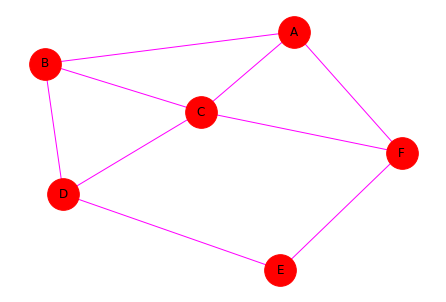

In [59]:
g = nx.Graph()
 
g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('A', 'F')

g.add_edge('B', 'C')
g.add_edge('B', 'D')

g.add_edge('C', 'F')
g.add_edge('C', 'D')

g.add_edge('D', 'E')

g.add_edge('E', 'F')

g.add_edge('F', 'E')
nx.draw(g, with_labels = True, node_color='red', node_size=1000, edge_color = "magenta")

## Реализация

In [60]:
print(dijkstra(graph, 'A'))

{'A': 0, 'B': 7, 'C': 9, 'D': 20, 'E': 20, 'F': 11}
